# 1.Librerias

In [68]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import os

# Lo ejecuto por unica vez
# import nltk
# nltk.download('vader_lexicon')


# 2.Datos

In [77]:
BASE_DIR = './'

PATH_TO_TRAIN = os.path.join(BASE_DIR, "data/train")
PATH_TO_DATA = os.path.join(BASE_DIR, "data")

SEED = 55 #Semilla de procesos aleatorios (para poder replicar exactamente al volver a correr un modelo)
BATCH_SIZE= 50
TEST_SIZE = 0.2 #Facción para train/test= split

In [98]:
train = pd.read_csv(os.path.join(PATH_TO_TRAIN,'train.csv'))
color_labels = pd.read_csv(os.path.join(PATH_TO_DATA,'color_labels.csv')) 
state_labels = pd.read_csv(os.path.join(PATH_TO_DATA,'state_labels.csv')) 
breed_labels= pd.read_csv(os.path.join(PATH_TO_DATA,'breed_labels.csv'))


Agrego el campo objetivo

In [99]:

# Crear los límites para las categorías
bins = [-1, 3, 6, 12, 24, 36, 72, 144, np.inf]  # Empieza en -1 para incluir el 0

# Crear los nombres de las categorías
labels = [0,1,2,3,4,5,6,7]

# Crear la nueva columna 'age_target' utilizando pd.cut
train['Age_target'] = pd.cut(train['Age'], bins=bins, labels=labels)

# 3.Analisìs Basico

In [6]:
print("Train - Filas y Columnas: ",train.shape)
print("Color Labels - Filas y Columnas: ",color_labels.shape)
print("States - Filas y Columnas: ",state_labels.shape)

Train - Filas y Columnas:  (14993, 25)
Color Labels - Filas y Columnas:  (7, 2)
States - Filas y Columnas:  (15, 2)


In [7]:
train.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


### 3.1 Train Head

In [8]:
train.head(4)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Age_target
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,0
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0
3,1,Miko,4,307,0,2,1,2,0,2,...,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,1


### 3.2 Color Labels

In [9]:
print(color_labels)

   ColorID ColorName
0        1     Black
1        2     Brown
2        3    Golden
3        4    Yellow
4        5     Cream
5        6      Gray
6        7     White


### 3.3 State Labels

In [10]:
print(state_labels)

    StateID        StateName
0     41336            Johor
1     41325            Kedah
2     41367         Kelantan
3     41401     Kuala Lumpur
4     41415           Labuan
5     41324           Melaka
6     41332  Negeri Sembilan
7     41335           Pahang
8     41330            Perak
9     41380           Perlis
10    41327     Pulau Pinang
11    41345            Sabah
12    41342          Sarawak
13    41326         Selangor
14    41361       Terengganu


3.4 Mapeo de Campos 

In [11]:
train['MaturitySize'] = train['MaturitySize'].apply(lambda x: 'Small' if x == 1 
                                                    else 'Medium' if x == 2 
                                                    else 'Large' if x == 3 
                                                    else 'Extra Large' if x == 4 
                                                    else 'Not Specified' if x == 0 
                                                    else 'Unknown')  # Por si hay otros valores inesperados

train['FurLength'] = train['FurLength'].apply(lambda x: 'Short' if x == 1 
                                                    else 'Medium' if x == 2 
                                                    else 'Long' if x == 3 
                                                    else 'Not Specified' if x == 0 
                                                    else 'Unknown')  # Por si hay otros valores inesperados

train['Vaccinated'] = train['Vaccinated'].apply(lambda x: 'Yes' if x == 1 
                                                    else 'No' if x == 2 
                                                    else 'Not Sure' if x == 3 
                                                    else 'Unknown')  # Por si hay otros valores inesperados
train['Dewormed'] = train['Dewormed'].apply(lambda x: 'Yes' if x == 1 
                                                    else 'No' if x == 2 
                                                    else 'Not Sure' if x == 3 
                                                    else 'Unknown')  # Por si hay otros valores inesperados
train['Sterilized'] = train['Sterilized'].apply(lambda x: 'Yes' if x == 1 
                                                    else 'No' if x == 2 
                                                    else 'Not Sure' if x == 3 
                                                    else 'Unknown')  # Por si hay otros valores inesperados
train['Health'] = train['Health'].apply(lambda x: 'Healthy' if x == 1 
                                                    else 'Minor Injury' if x == 2 
                                                    else 'Serious Injury' if x == 3 
                                                    else 'Not Specified' if x == 0 
                                                    else 'Unknown')  # Por si hay otros valores inesperados

# 4. Analisis Exploratorio

La idea es usar herramientas estadisticas y de visualizacion  para:
    * Crear un mapa mental del set de datos (entenderlo)
    * Empezar a encontrar respuestas a la pregunta objetivo del problema

**Lo voy a plantear en 3 fases:**

1. Analisis de cada variable de manera individual
2. Analisis univariado/bivariado
3. Analisis de Texto


## 4.1  Analisis de cada variable de manera individual

Nos permite entender las caracteristicas generales de cada variable de nuestro set de datos

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  object 
 10  FurLength      14993 non-null  object 
 11  Vaccinated     14993 non-null  object 
 12  Dewormed       14993 non-null  object 
 13  Sterilized     14993 non-null  object 
 14  Health         14993 non-null  object 
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

**Target: Age target**

1. 0 a 3 neses
2. 4 a 6 meses
3. a 12 meses
4. 13 a 24 meses
5. 25 a 36 meses
6. 37 a 72 meses
7. 73 a 144 meses
8. 145 meses o mas

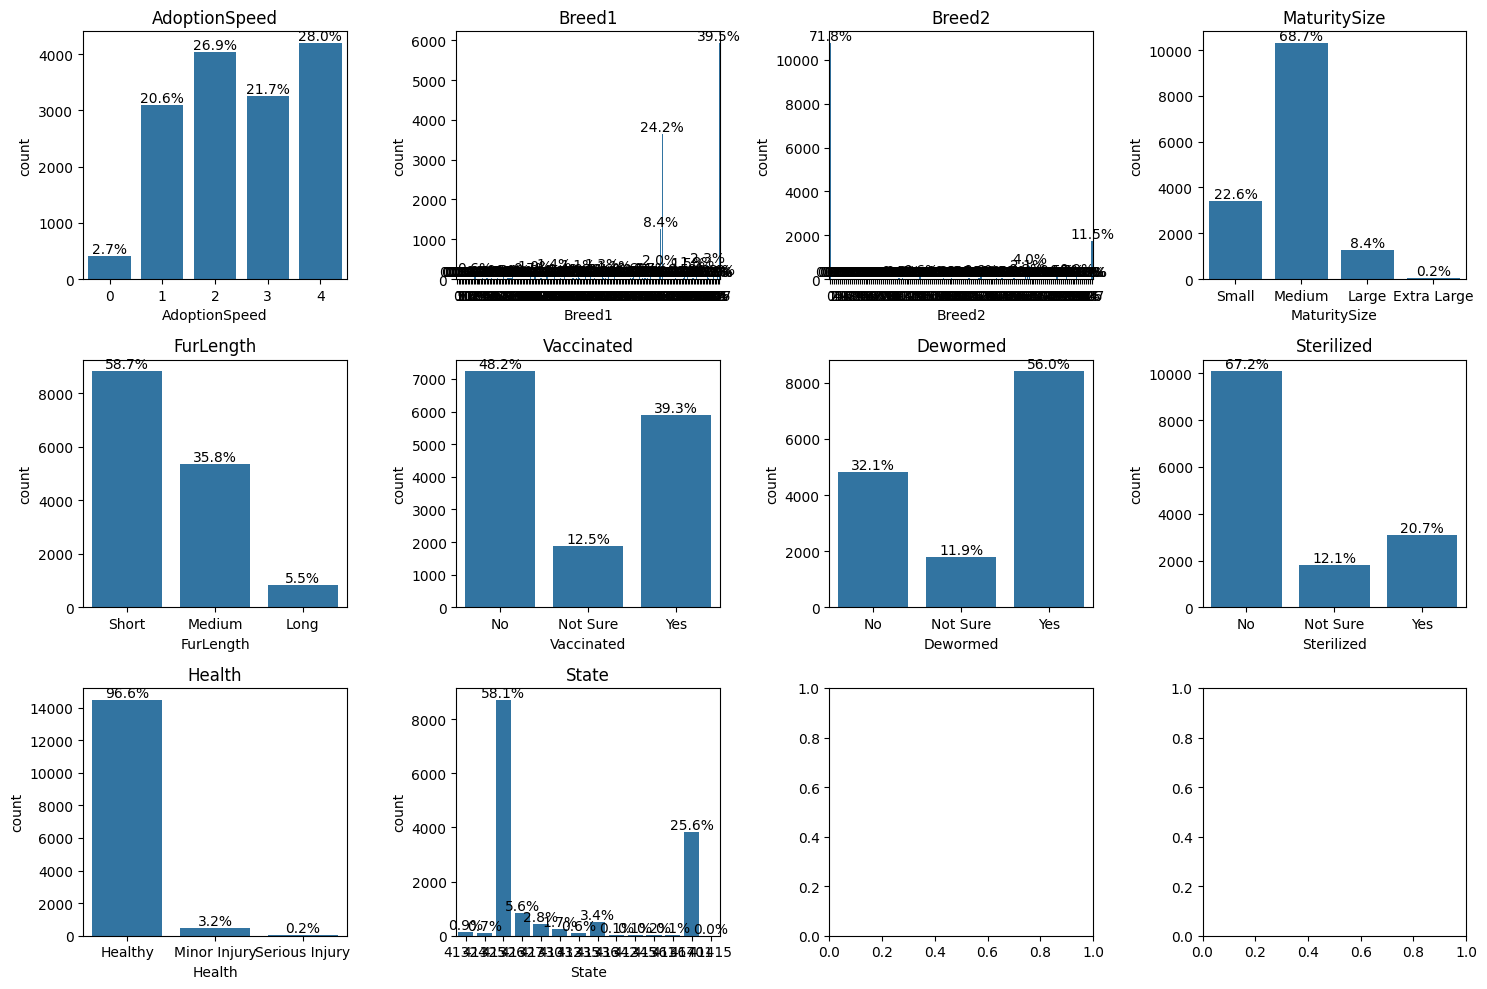

In [12]:
variables_categoricas=['AdoptionSpeed','Breed1','Breed2','MaturitySize','FurLength','Vaccinated','Dewormed','Sterilized','Health','State']

fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

ax = ax.flatten()

# Calculo el total de registros en el dataset
total = len(train)

for i, col in enumerate(variables_categoricas):
    # Crear el gráfico de barras con seaborn en el subplot correspondiente
    sns.countplot(x=col, data=train, ax=ax[i])
       
    for p in ax[i].patches:
        count = p.get_height()  # Obtener la cantidad de la categoría
        percentage = 100 * count / total  # Calcular el porcentaje
        ax[i].annotate(f'{percentage:.1f}%', 
                       (p.get_x() + p.get_width() / 2, count),  # Ubicación del texto
                       ha='center', va='bottom')  # Centrado en la barra

    ax[i].set_title(col)

plt.tight_layout()
plt.show()

Analizando las mascotas vemos que hay mas Perros que Gatos en adopcion

/tmp/ipykernel_2183276/2455340649.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['1-Dog','2-Cat'])
/tmp/ipykernel_2183276/2455340649.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['1-Dog','2-Cat'])


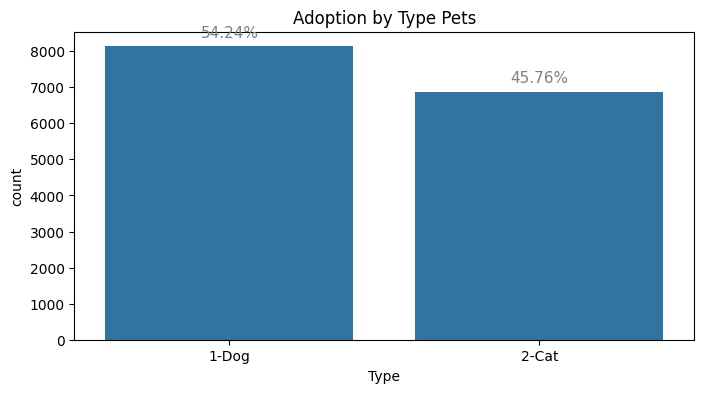

In [13]:
plt.figure(figsize=(8, 4));
g = sns.countplot(x='Type', data=train)
plt.title('Adoption by Type Pets');
ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / train.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
         textcoords='offset points') 
     ax.set_xticklabels(['1-Dog','2-Cat']) 

Comportamiento de variables Numericas (Age, Fee, Quantity, VideAmt, PhotoAmt)

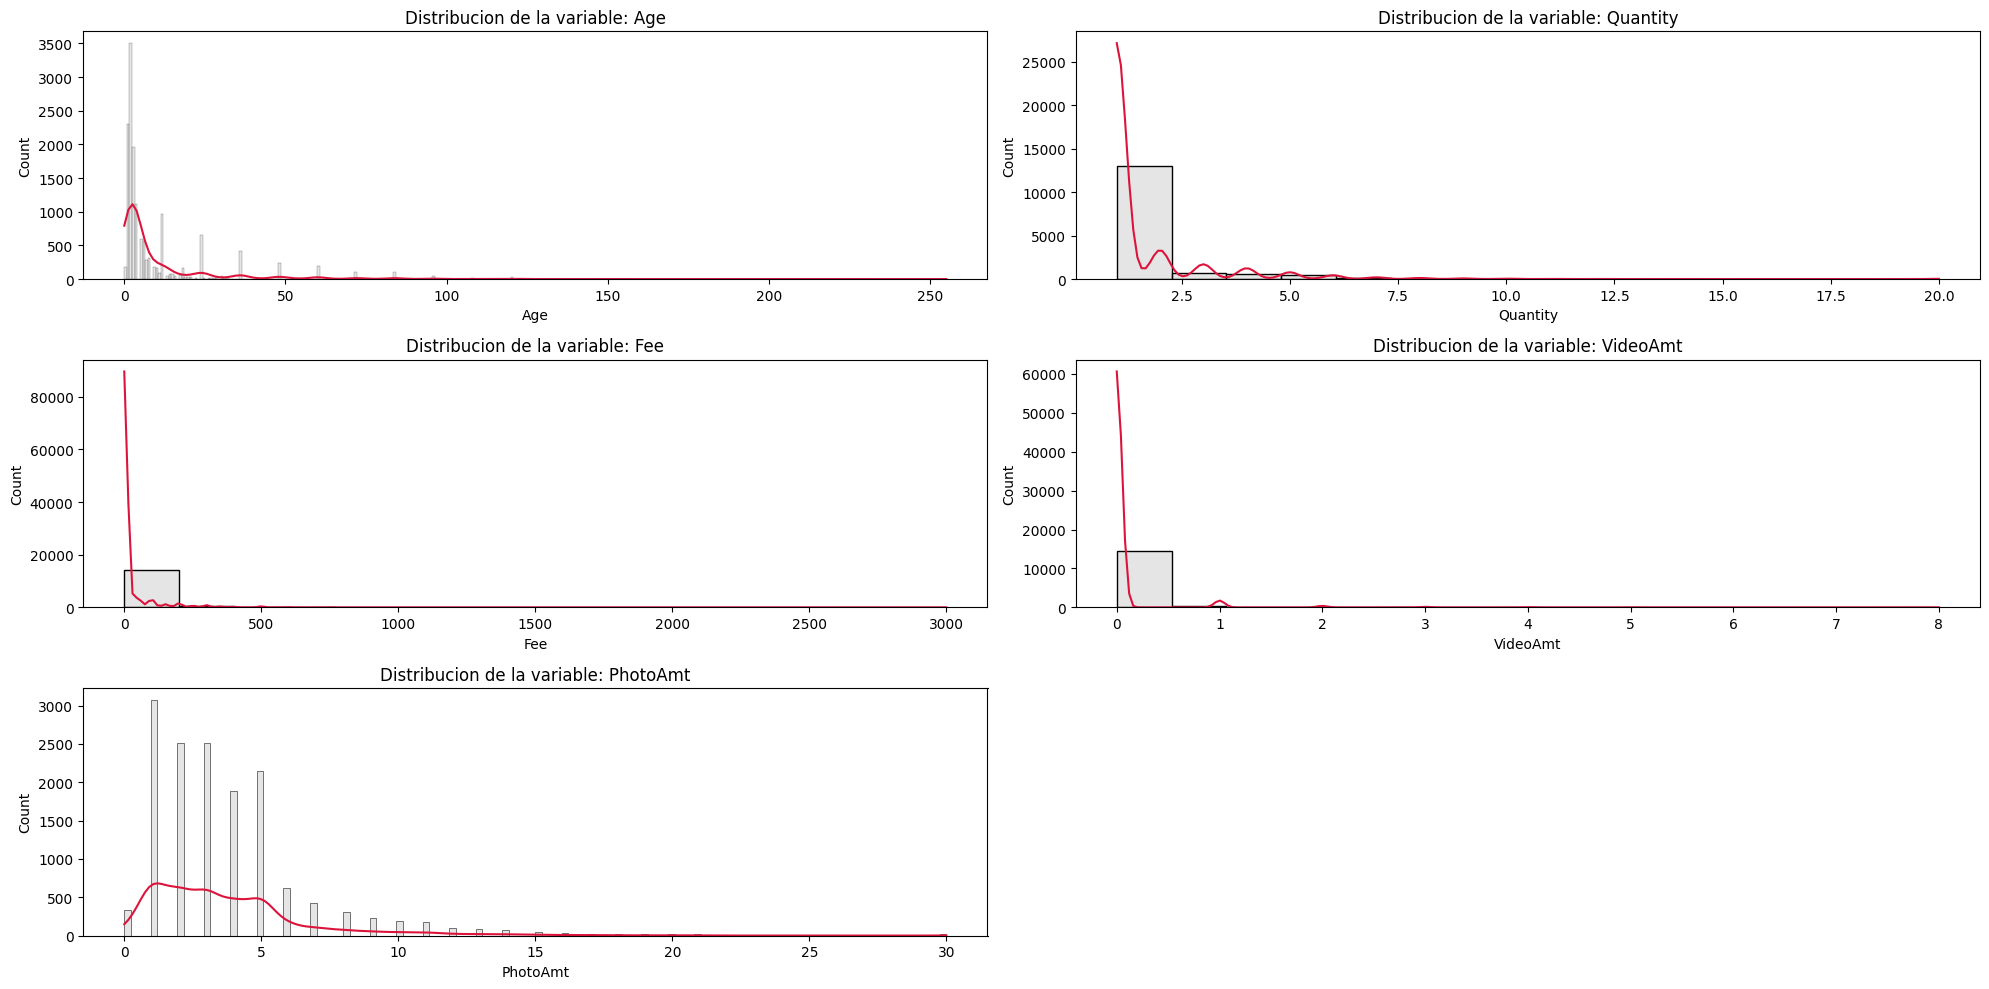

In [14]:
variables_numericas = ['Age', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt']

plt.figure(figsize=(20,10))


for i, col in enumerate(variables_numericas,1):
    plt.subplot(3,2,i)
    ax=sns.histplot(train[col], color='0.8',kde=True)
    ax.lines[0].set_color('crimson')
    plt.title(f'Distribucion de la variable: {col}')
    
plt.tight_layout()
plt.show()

En el histograma podemos observar que la mayoria de los gatos en nuestros datos son menores a 50 meses

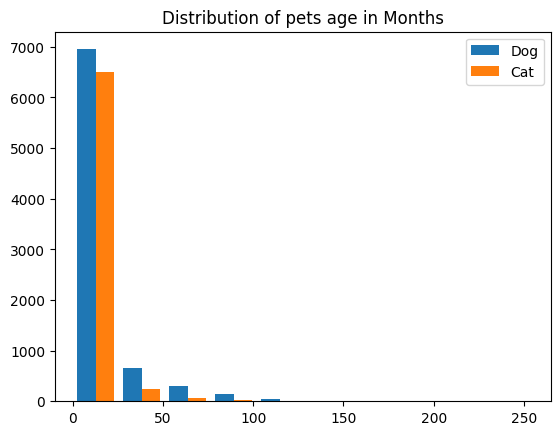

In [15]:
bins = [0,12,24,36,48,60,72,84,120]
fig, ax = plt.subplots()

age_dogs=train[train['Type'] == 1]['Age'] 
age_cats=train[train['Type'] == 2]['Age'] 

#plt.hist([age_dogs,age_cats],bins = bins)
plt.hist([age_dogs,age_cats])
plt.legend(["Dog","Cat"])
plt.title('Distribution of pets age in Months');

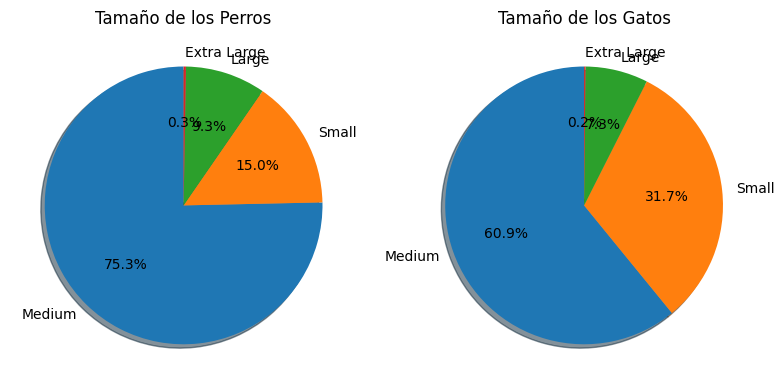

In [16]:

size_type_1 = train[train['Type'] == 1]['MaturitySize']
size_type_2 = train[train['Type'] == 2]['MaturitySize']

conteo_categorias_1 = size_type_1.value_counts()
conteo_categorias_2 = size_type_2.value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.pie(conteo_categorias_1.values, labels=conteo_categorias_1.index, autopct='%1.1f%%', startangle=90,shadow=True )
ax1.set_title('Tamaño de los Perros')

ax2.pie(conteo_categorias_2.values, labels=conteo_categorias_2.index, autopct='%1.1f%%', startangle=90,shadow=True)
ax2.set_title('Tamaño de los Gatos')

plt.tight_layout()

# Mostrar los gráficos
plt.show()


Analisis por ciudades

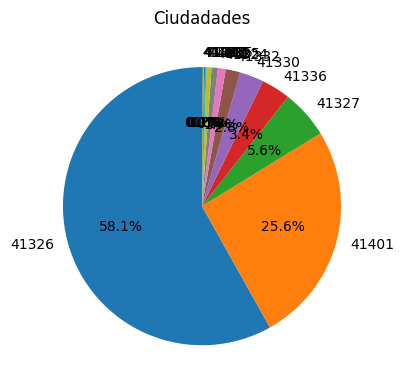

In [17]:
conteo_categorias = train['State'].value_counts()

fig, ax1 = plt.subplots(figsize=(8, 4))

ax1.pie(conteo_categorias.values, labels=conteo_categorias.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Ciudadades')

plt.tight_layout()

# Mostrar los gráficos
plt.show()


**Observaciones**
* Adoption Speed:En esta variable podemos ver que menos del 3% de las mascotas fueron adoptadas el mismo dia que se incuyeron en la lista. Un 50% de las mascotas son adoptadas durante el primer mes que son publicadas. Esto puede demostrar un alto interes de las personas por adoptar
* Maturity Size: el 80% de las mascotas son de tamaño small y medium, siendo esta ultima el tamaño con mas mascotas 69%.
* Furlengh: Esta variable nos indica que màs de la mitad de las mascotas tienen el pelo "short", "medium" un %36 y un %5 tiene el pelo largo.
* Salud: Las graficas nos muestran que 48% de las mascotas no estan vacunadas y teniendo en cuenta el dato de las "Not Sure", se puede decir que mas de la mitad de las mascotas no estan vacunadas.Es contradictorio con el campo "Dewormed" lo que indica que mas de un 50% de las mascotas estan desparasitadas. Sera mas economico desparasitar que vacunar?
La variable "Sterilized" nos muestra que hay un alto porcentaje de mascotas sin castrar. +67% +- 70% lo que puede traer consecuencias en la reproducciòn masiva.
Helth: Esta variable nos muestra que la mayoria de las mascotas estan bien de salud, esto puede estar relacionada a la edad de las mascotas.


* En las variables numericas podemos observar que la variable Age, no muestra que la mayoria de las mascotas son jovenes con una media 10 meses.
Quantity: No muestra que a veces hay varias mascotas en un anuncio, pero la mayoria esta en el rango de 1.5
Fee: Esta variable muestra que hay algunas mascotas que es necesario pagar un valor por ellas (en alguna unidad), y la mayoria se ofrecen de manera gratuita.
VideoAmt: En la mayoria de mascotas no se cuenta con un video. (Se puede descartar la variable?).
PhotoAmt: Hay mascotas que suelen tener muchas fotos, pero la gran mayoria de mascotas tienen una foto en su perfil



## 4.2  Analisis univariado

Teniendo claras algunas caracteristicas generales de cada dato individual, la idea ahora es analizar si existe alguna relacion  entre las posibles variales predictoras y la variable a predecir 

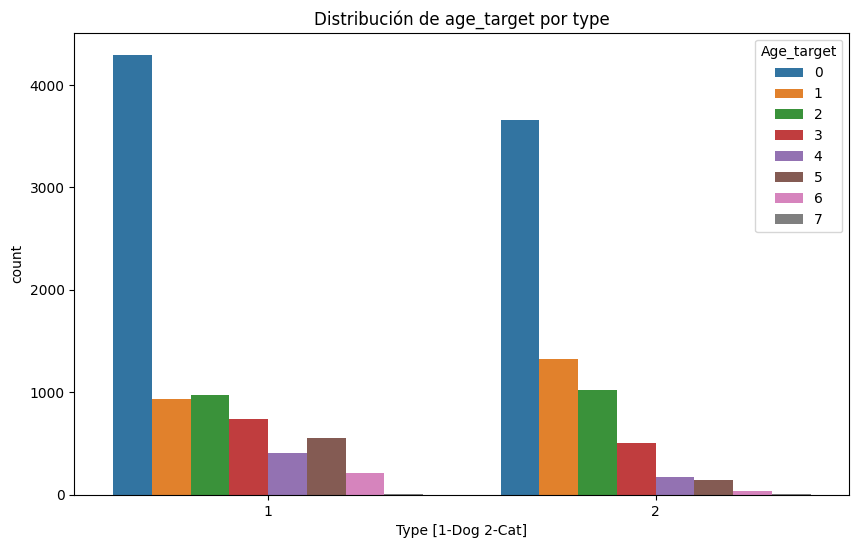

In [48]:
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura si lo necesitas
sns.countplot(x='Type', hue='Age_target', data=train)

plt.title('Distribución de age_target por type')
plt.xlabel('Type [1-Dog 2-Cat]')
plt.show()

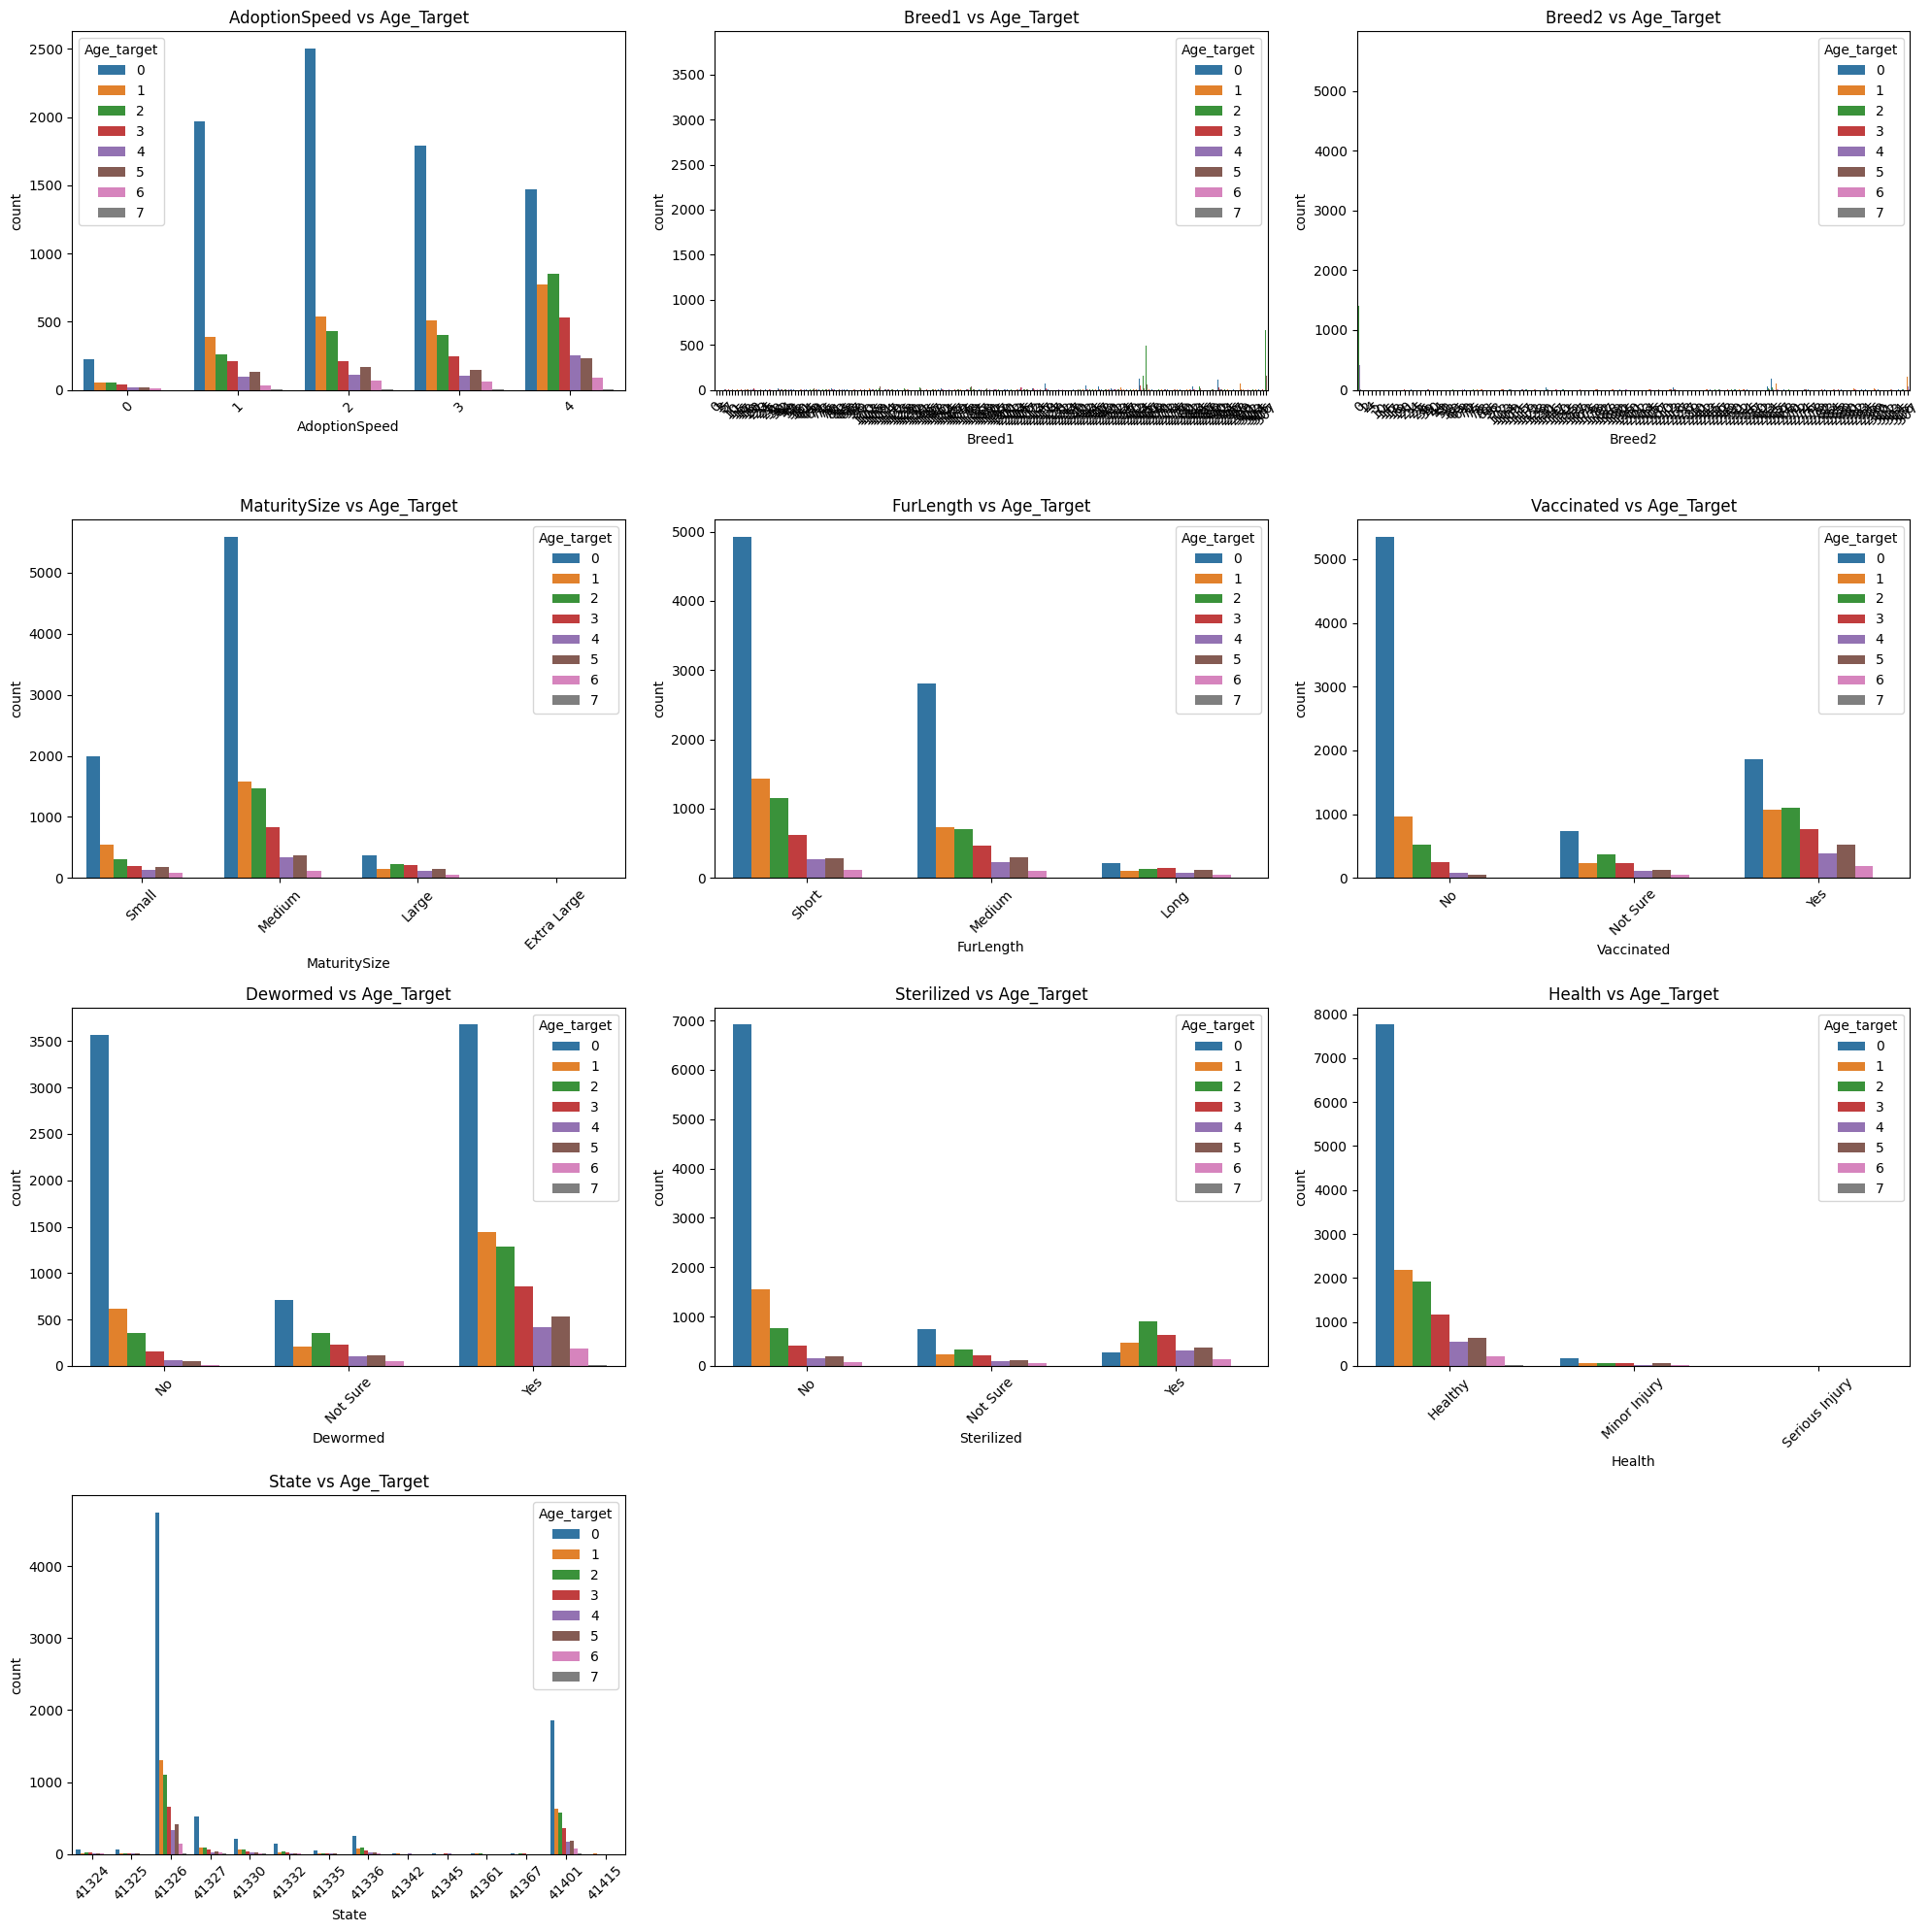

In [53]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(variables_categoricas, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=train, x=col, hue='Age_target')
    plt.title(f'{col} vs Age_Target')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Type                      14993 non-null  int64  
 1   Name                      13728 non-null  object 
 2   Age                       14993 non-null  int64  
 3   Breed1                    14993 non-null  int64  
 4   Breed2                    14993 non-null  int64  
 5   Gender                    14993 non-null  int64  
 6   Color1                    14993 non-null  int64  
 7   Color2                    14993 non-null  int64  
 8   Color3                    14993 non-null  int64  
 9   MaturitySize              14993 non-null  int64  
 10  FurLength                 14993 non-null  int64  
 11  Vaccinated                14993 non-null  int64  
 12  Dewormed                  14993 non-null  int64  
 13  Sterilized                14993 non-null  int64  
 14  Health

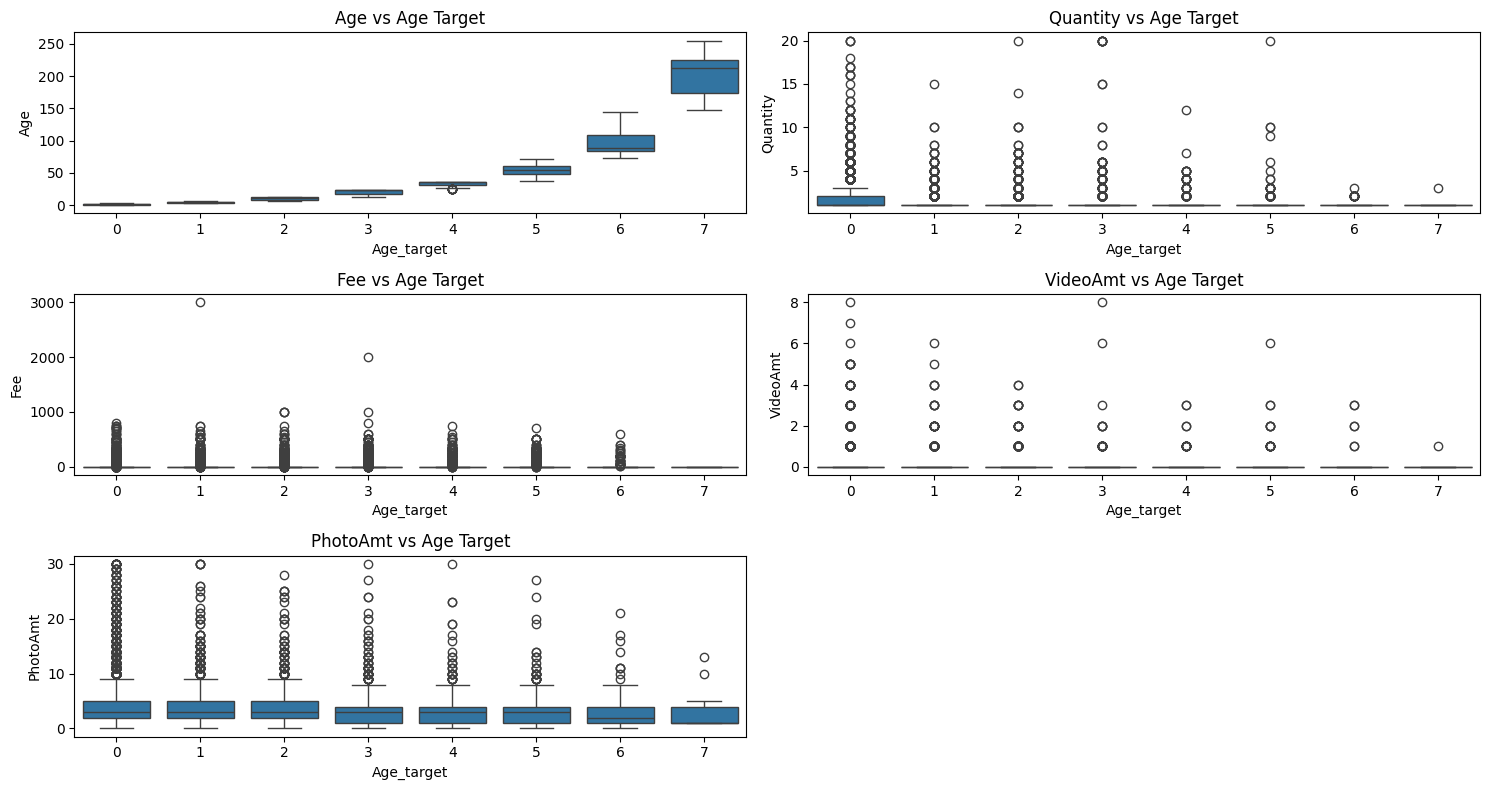

In [100]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(variables_numericas, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=train, x='Age_target', y=col)
    plt.title(f'{col} vs Age Target')
plt.tight_layout()
plt.show()


## 4.3  Analisis Bivariado

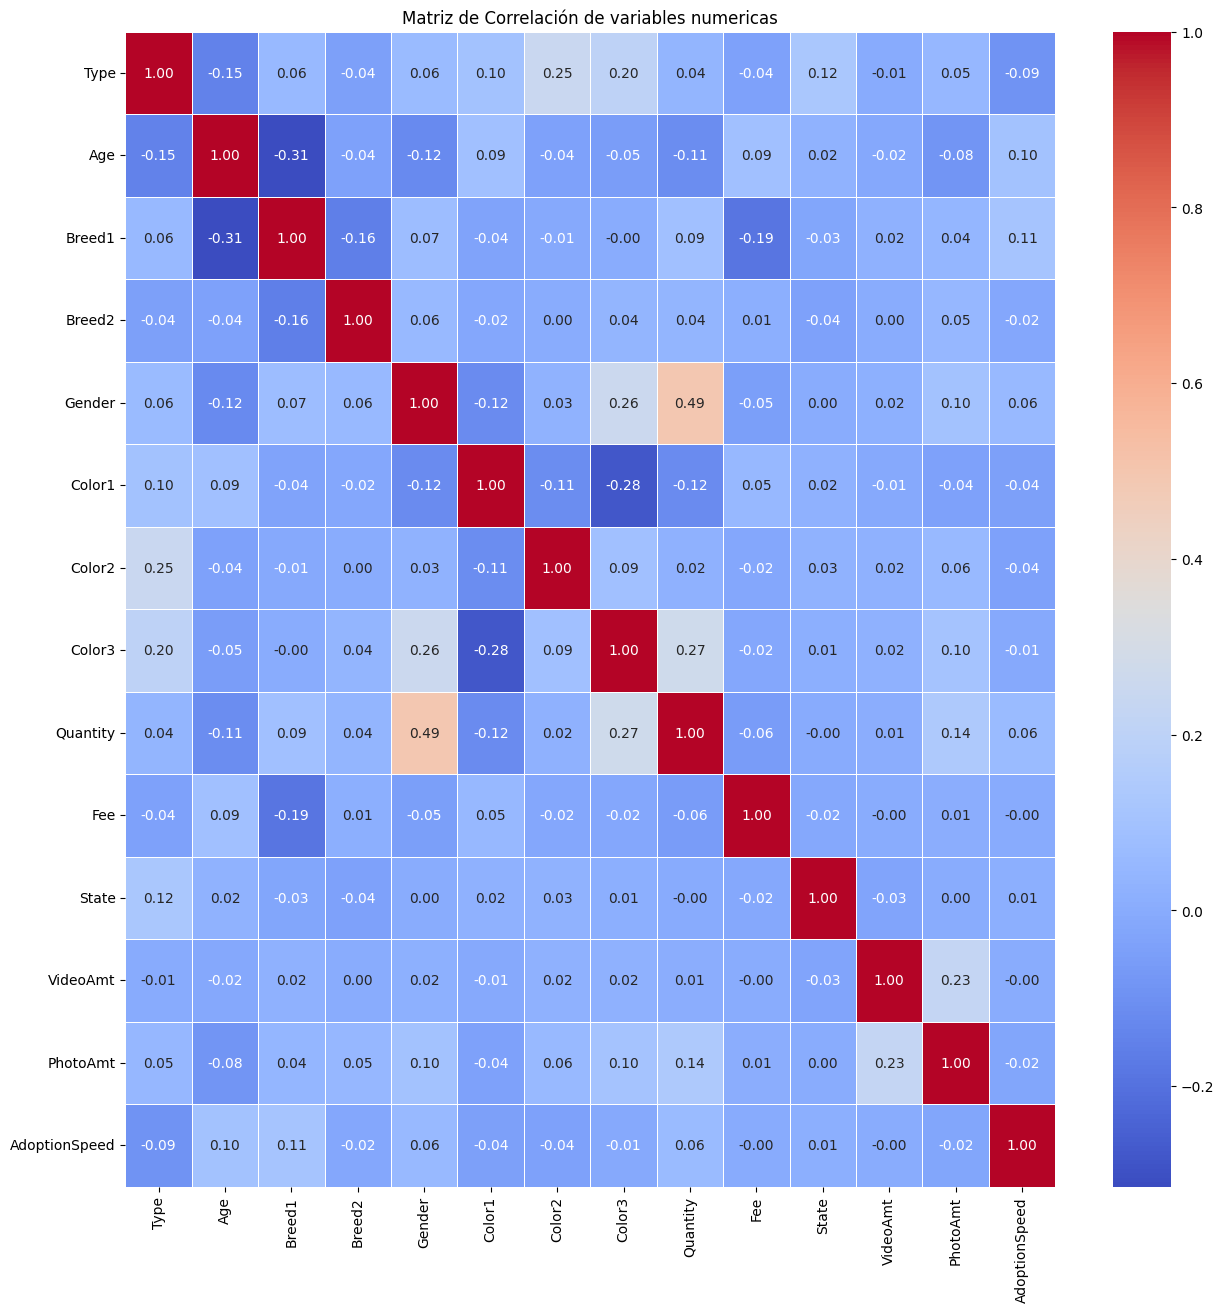

In [20]:
df_numericas = train.select_dtypes(include=[np.number])

corr = df_numericas.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de variables numericas')
plt.show()

## 4.4  Analisis de Texto

Variable Name

Existen apodos comunes por ejemplo Mimi y a veces escriben en el campo nombre colores,genero u otras caracteristicas de las mascotas. lo que me hace pensar que puede ser un campo que tenga importancia

In [22]:
train['Name'].value_counts()

Name
Baby                   66
Lucky                  64
No Name                54
Brownie                54
Mimi                   52
                       ..
Balakong Jaya Puppy     1
PP                      1
A Stray Cat             1
Fancy                   1
8                       1
Name: count, Length: 9059, dtype: int64

In [31]:
countNullCat = len(train[(train['Type'] == 2) & (train['Name'].isnull())])
countNullDog = len(train[(train['Type'] == 1) & (train['Name'].isnull())])

print(f"Hay { countNullDog } mascotas perro sin nombre en porcentaje:  {round((countNullDog / len(train))* 100,1) } %")
print(f"Hay { countNullCat } mascotas gato sin nombre en porcentaje: { round((countNullCat / len(train))* 100,1)} %")


Hay 653 mascotas perro sin nombre en porcentaje:  4.4 %
Hay 612 mascotas gato sin nombre en porcentaje: 4.1 %


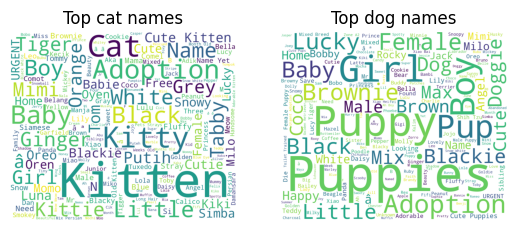

In [32]:
plt.subplot(1, 2, 1)
text_cat = ' '.join(train.loc[train['Type'] == 2, 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_cat)
plt.imshow(wordcloud)
plt.title('Top cat names')
plt.axis("off")

plt.subplot(1, 2, 2)
text_dog = ' '.join(train.loc[train['Type'] == 1, 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_dog)
plt.imshow(wordcloud)
plt.title('Top dog names')
plt.axis("off")

plt.show()

In [34]:
print('Nombre de Mascotas mas populares y Age Target')
for n in train['Name'].value_counts().index[:5]:
    print(n)
    print(train.loc[train['Name'] == n, 'Age_target'].value_counts().sort_index())
    print('')

Nombre de Mascotas mas populares y Age Target
Baby
Age_target
0    30
1    15
2     7
3    11
4     1
5     1
6     1
7     0
Name: count, dtype: int64

Lucky
Age_target
0    22
1    13
2     8
3     7
4     5
5     8
6     1
7     0
Name: count, dtype: int64

No Name
Age_target
0    36
1     4
2     8
3     2
4     2
5     0
6     2
7     0
Name: count, dtype: int64

Brownie
Age_target
0    29
1     5
2    10
3     6
4     2
5     2
6     0
7     0
Name: count, dtype: int64

Mimi
Age_target
0    17
1     9
2    12
3     8
4     3
5     3
6     0
7     0
Name: count, dtype: int64



In [35]:
train['Description'] = train['Description'].fillna('')
vectorizer = CountVectorizer(stop_words='english')
wordCounts = vectorizer.fit_transform(train['Description'])

wordCountsdf= pd.DataFrame(wordCounts.toarray(),columns=vectorizer.get_feature_names_out())
print(wordCountsdf.sum().sort_values(ascending=False).head(30))

text_description=wordCountsdf.sum().sort_values(ascending=False)

home          7849
dog           4540
cat           4093
adoption      4025
good          3563
adopt         3343
old           2881
contact       2801
interested    2784
looking       2766
playful       2749
love          2689
loving        2665
kitten        2626
care          2468
puppy         2325
owner         2275
healthy       2260
cats          2193
house         2178
rescued       2165
active        2151
like          2116
friendly      2053
new           2039
kittens       2022
months        1945
dogs          1913
cute          1909
food          1905
dtype: int64


(np.float64(-0.5), np.float64(1199.5), np.float64(999.5), np.float64(-0.5))

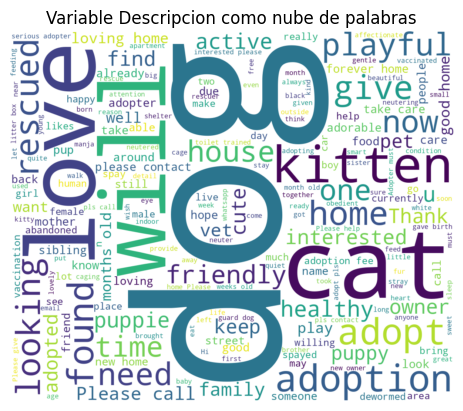

In [36]:
text_description = ' '.join(train['Description'].dropna().values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_description)

plt.imshow(wordcloud,interpolation='bilinear')
plt.title('Variable Descripcion como nube de palabras')
plt.axis("off")


**Analisis de Sentimiento**

Los score de sentimientos de esta libreria usualmente van de -1 a 1. Siendo -1 el valor maximo para sentimientos negativos y 1 el valor maximo para sentimientos positivos y 0 el valor de mjes neutrales.

In [37]:
analyzer = SentimentIntensityAnalyzer()
train['sentimiento_score'] = train['Description'].apply(lambda i: analyzer.polarity_scores(i)['compound'])


In [38]:
train['sentimiento'] = train['sentimiento_score'].apply(lambda x: 'neutral' if x == 0 
                                                    else 'neg' if x < 0 
                                                    else 'pos' if x > 0 
                                                    else 'Unknown')  # Por si hay otros valores inesperados

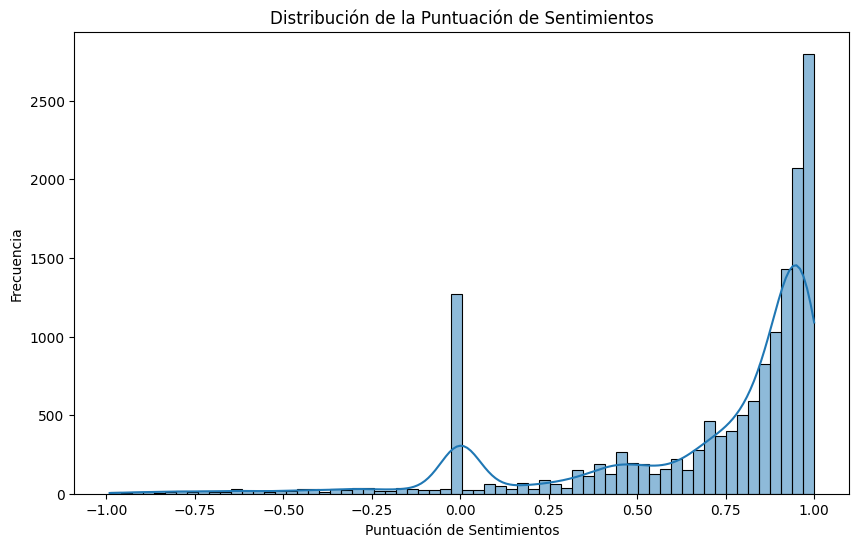

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(train['sentimiento_score'], kde=True)
plt.title('Distribución de la Puntuación de Sentimientos')
plt.xlabel('Puntuación de Sentimientos')
plt.ylabel('Frecuencia')
plt.show()

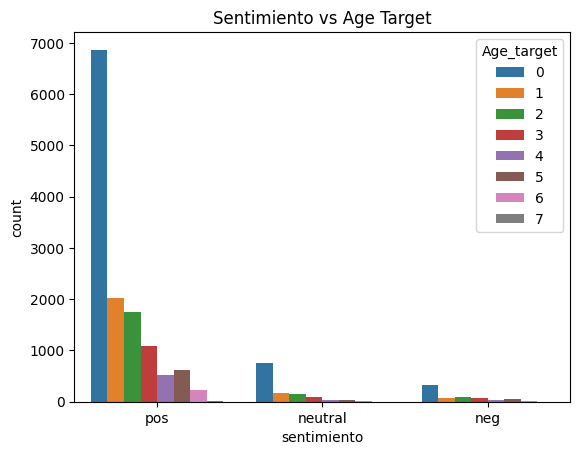

In [41]:
sns.countplot(data=train, x=train['sentimiento'], hue='Age_target')
plt.title('Sentimiento vs Age Target')
plt.show()

Analizando la variable target "Edad"

Se puede observar que la mayoria de mascotas son jovenes menores a 1 años, pero tambien se puede observar que hay valores que hacen pensar que la gente no esta segura de la edad de la mascota.
Se pueden observar algunos outliers de mas 12 años y hasta 20 vamos analizarlos.

In [59]:
print(train['Age'].value_counts().head(10))
print(train['Age_target'].value_counts().head(10))



Age
2     3503
1     2304
3     1966
4     1109
12     967
24     651
5      595
6      558
36     417
8      309
Name: count, dtype: int64
Age_target
0    7952
1    2262
2    1997
3    1241
5     694
4     583
6     253
7      11
Name: count, dtype: int64


In [61]:
print(train['Age'].value_counts().tail(4))
print(train['Age_target'].value_counts().tail(4))


Age
88     1
43     1
238    1
100    1
Name: count, dtype: int64
Age_target
5    694
4    583
6    253
7     11
Name: count, dtype: int64


Raza

Podemos observar que a veces la gente escribe que es raza mixta en ambos campos y aparacen razas que son descripciones o caracteristicas. lo cual nos lleva a pensar que muchas veces realmente no son de raza.


In [85]:
train = train.merge(breed_labels, left_on=['Breed1', 'Type'], right_on=['BreedID', 'Type'], how='left', suffixes=('', '_PrimaryBreed'))
train = train.merge(breed_labels, left_on=['Breed2', 'Type'], right_on=['BreedID', 'Type'], how='left', suffixes=('', '_SecondaryBreed'))

In [92]:
(train['BreedName']+'--'+train['BreedName_SecondaryBreed']).value_counts().head(10)

Mixed Breed--Mixed Breed                      1003
Domestic Short Hair--Domestic Short Hair       264
Labrador Retriever--Mixed Breed                118
Domestic Medium Hair--Domestic Medium Hair      90
Terrier--Mixed Breed                            85
Domestic Medium Hair--Domestic Short Hair       84
Domestic Short Hair--Domestic Medium Hair       79
Domestic Short Hair--Tabby                      62
Mixed Breed--Labrador Retriever                 59
German Shepherd Dog--Mixed Breed                54
Name: count, dtype: int64